Abdur Rehman

**"What are the underlying factors contributing to the high costs of healthcare in the United States"**

To help me answer this question, I will add a obesity(per age) column in the dataset. The addition of this new column will help answer the question about the underlying factors contributing to high healthcare costs in the United States because obesity is a major risk factor for many chronic diseases, such as heart disease, diabetes, and certain types of cancer. By including data on obesity rates in the healthcare cost data set, you can explore the relationship between obesity and healthcare costs, and investigate whether regions with higher rates of obesity also have higher healthcare costs. This information can help policymakers and healthcare providers identify strategies to reduce healthcare costs by addressing the underlying causes of chronic disease.

In [1]:
import pandas as pd

project_data = pd.read_csv('../data/raw/Medical_Cost.csv')

project_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


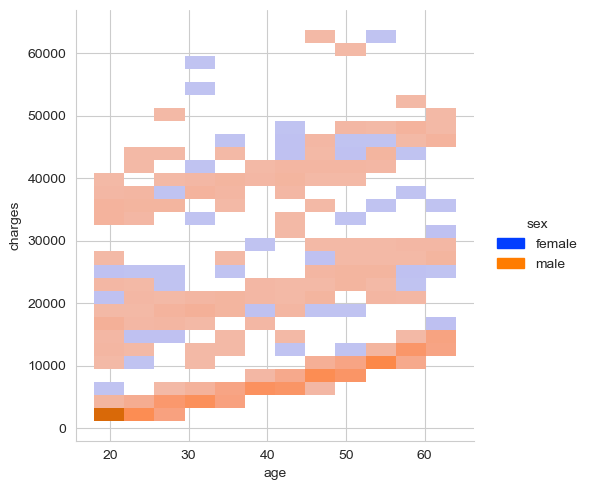

In [7]:
import pandas as pd
import seaborn as sns
project_data = pd.read_csv('../data/raw/Medical_Cost.csv')
sns.set_style('whitegrid')
df = sns.displot(x='age', hue = 'sex', y='charges', data=project_data, palette='bright')



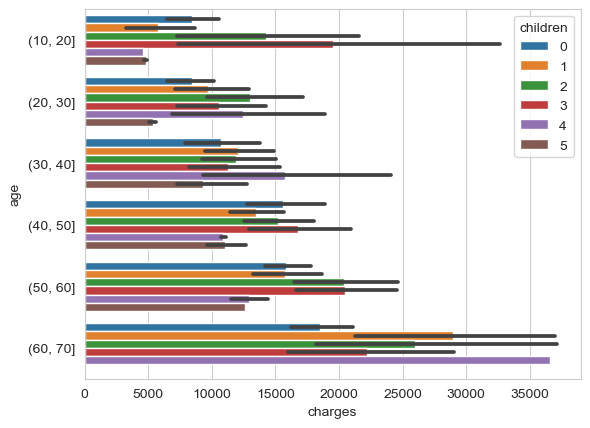

In [9]:
import pandas as pd
import seaborn as sns



age_ranges = pd.cut(project_data['age'], bins=[10, 20, 30, 40,50,60,70])



df = sns.barplot(y =age_ranges, x = 'charges', hue='children', data=project_data)



<Figure size 1000x800 with 0 Axes>

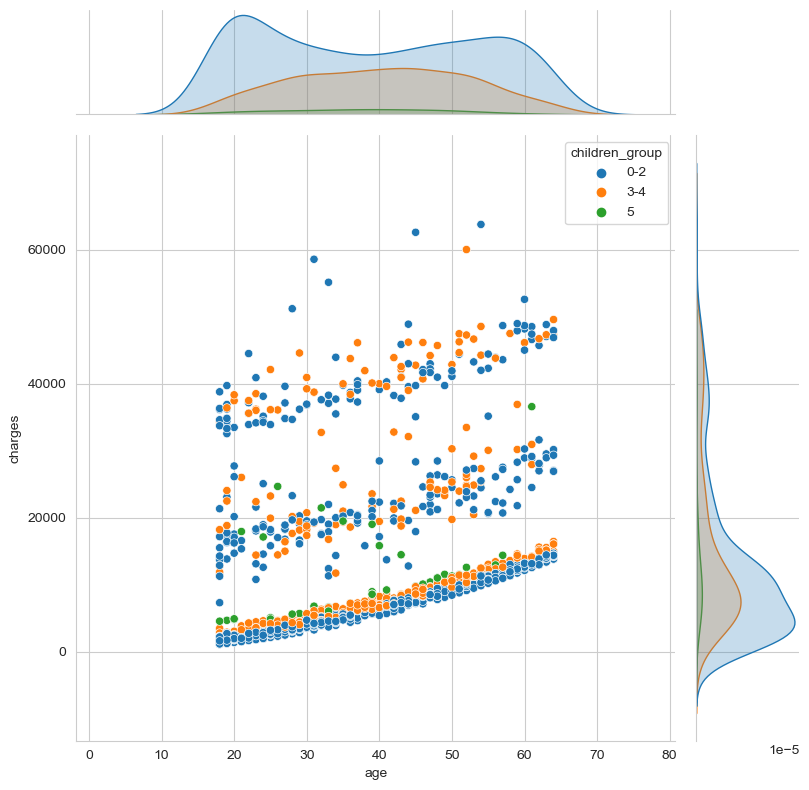

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

project_data = pd.read_csv('../data/raw/Medical_Cost.csv')

# Create a new column 'children_group' that assigns each child to a group
project_data['children_group'] = pd.cut(project_data['children'], bins=[-1, 1, 3, 5], labels=['0-2', '3-4', '5'])

sns.set_style('whitegrid')

plt.figure(figsize=(10, 8))

sns.jointplot(y='charges', x='age', hue='children_group', data=project_data, height=8)
